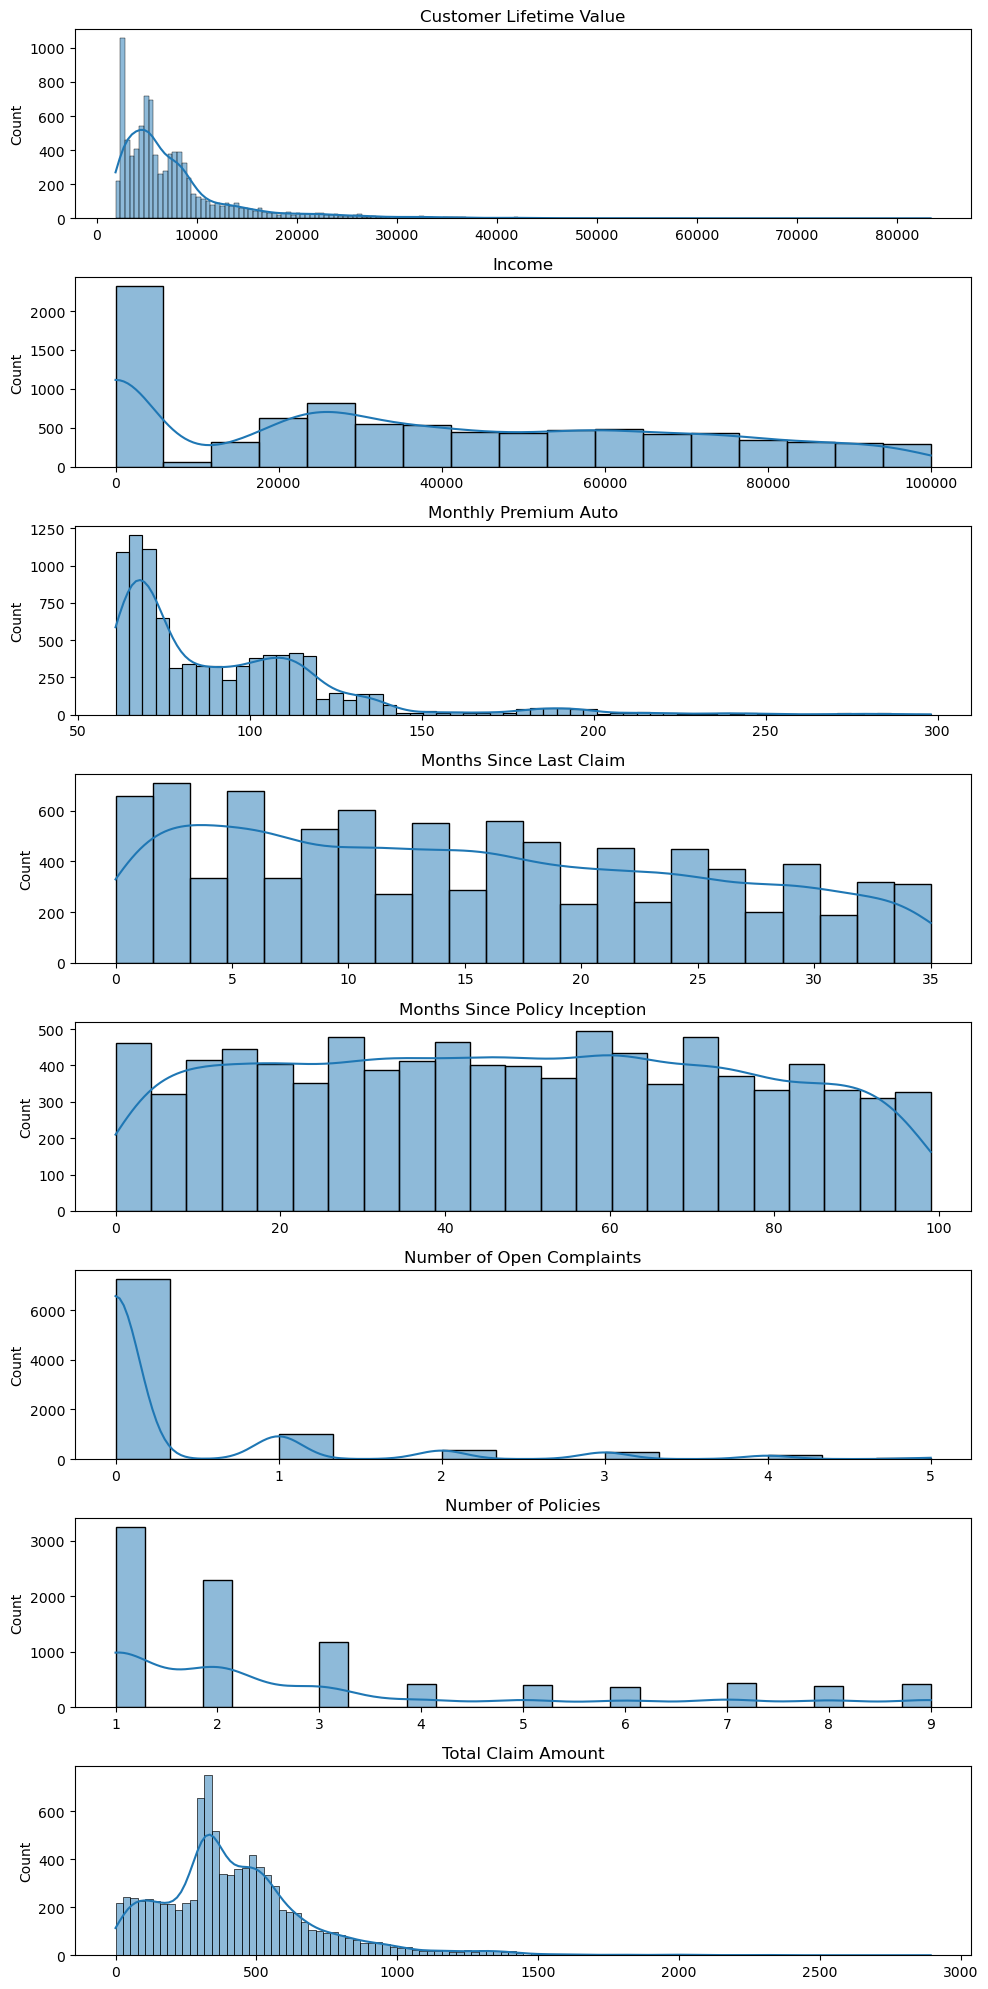

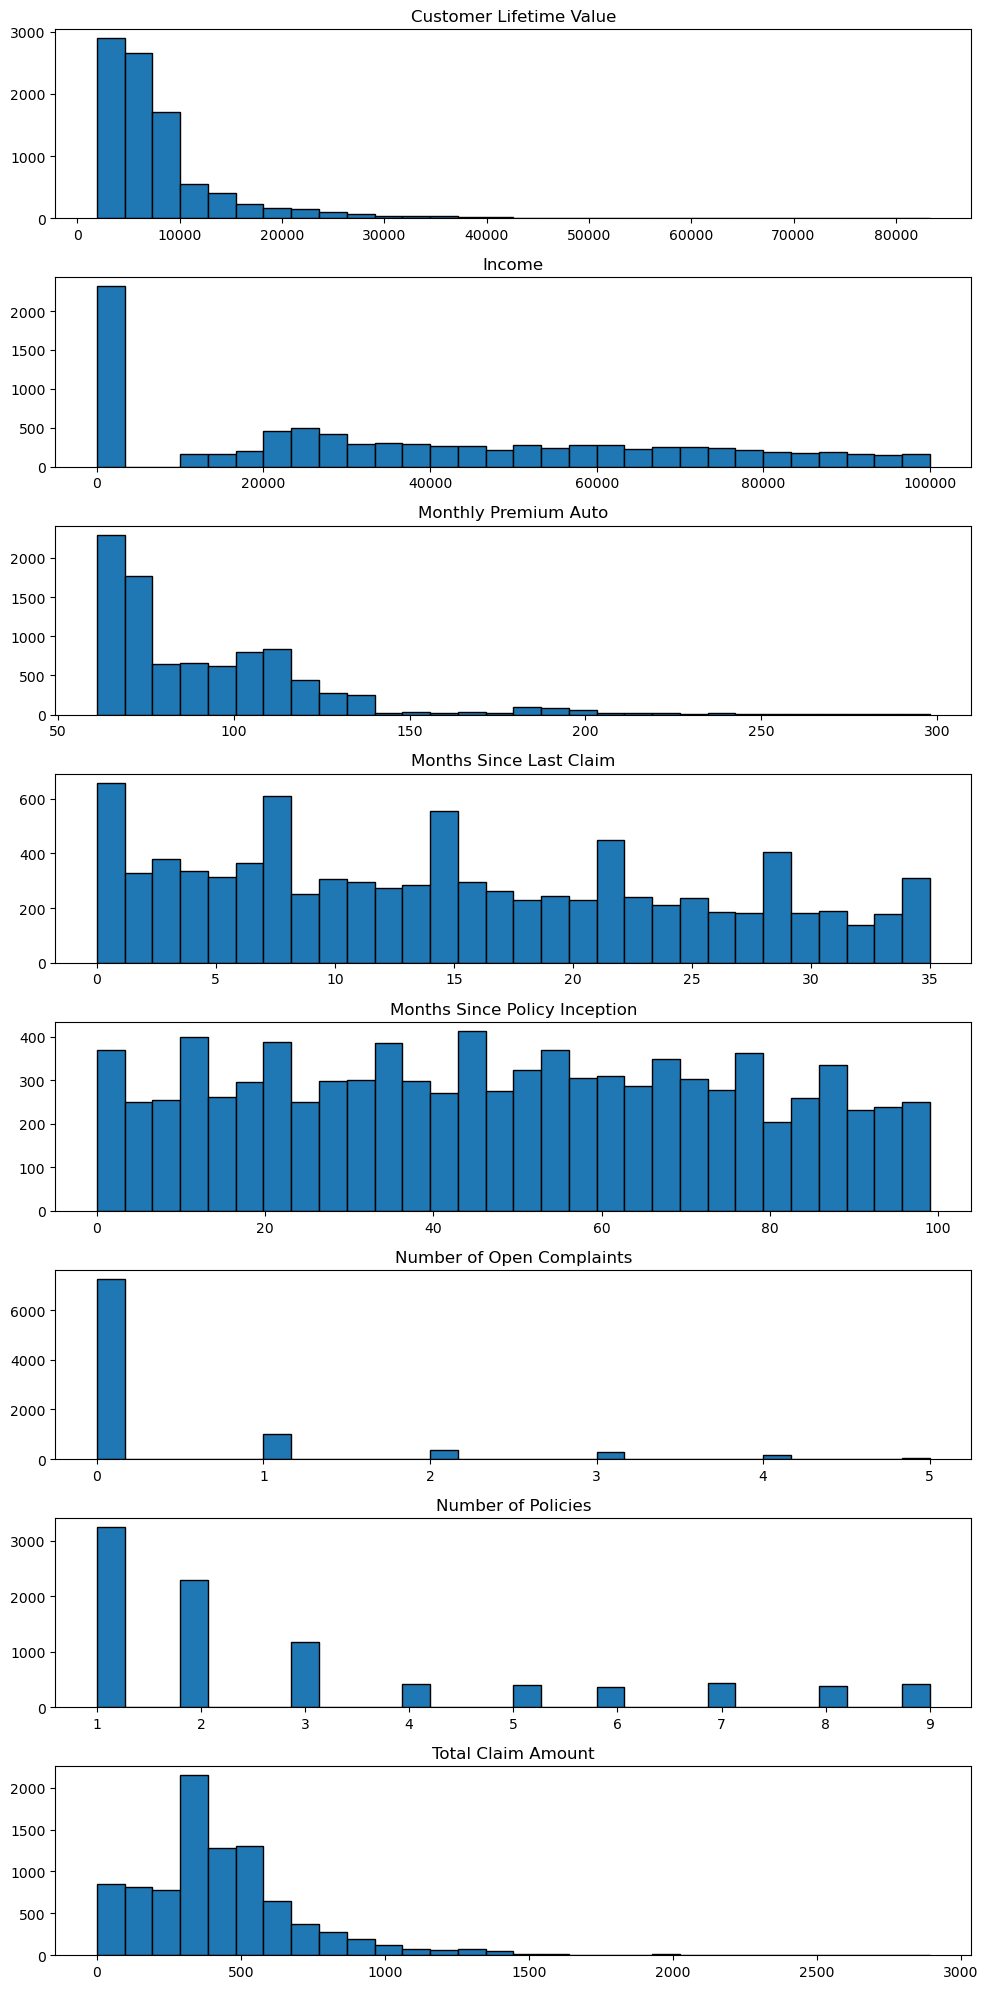

Skewness values:
 Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64


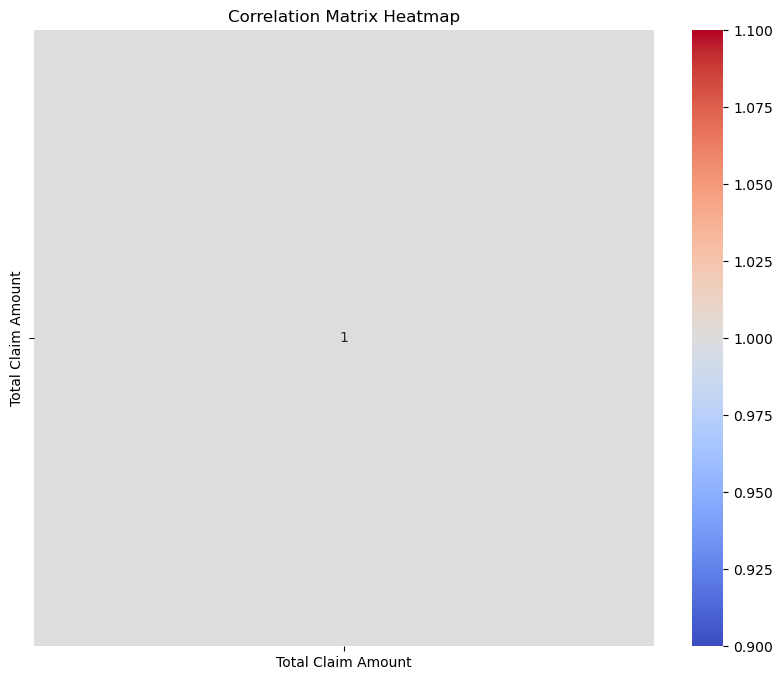

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_customer_analysis (1).csv')

numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=object)

fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(10, 20))
for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(10, 20))
for i, column in enumerate(numerical.columns):
    axes[i].hist(numerical[column], bins=30, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

skewness = numerical.skew()
print("Skewness values:\n", skewness)

correlation_matrix = numerical.corr()

for column in correlation_matrix.columns:
    if column != 'Total Claim Amount':
        if abs(correlation_matrix[column]['Total Claim Amount']) < abs(correlation_matrix[column].drop('Total Claim Amount').max()) and abs(correlation_matrix[column].drop('Total Claim Amount').max()) > 0.9:
            numerical.drop(column, axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()
